**About the task**

The objective of the task was to perform Explanatory Data Analysis (EDA) for recognition information in the dataset.

The business objective was to understand the pricing strategy of the mobile phone market.

Assumptions:

• Pandas and Numpy module to make descriptive statistics for each variable;

• Pandas module to recognize the relationship between variables (calculation statistics in subgroups and pivot tables);

• visualization the distribution of the target variable, empirical distributions of the explanatory variables using the Matplotlib package.

Source data: https://www.kaggle.com/iabhishekofficial/mobile-price-classification

**Importing libraries**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
from plotly.offline import iplot

def enable_plotly_in_cell():
  import IPython
  from plotly.offline import init_notebook_mode
  display(IPython.core.display.HTML('''<script src="/static/components/requirejs/require.js"></script>'''))
  init_notebook_mode(connected=False)

**Basic analysis of the dataset**

In [ ]:
# Import the dataset
mp = pd.read_csv('/content/drive/MyDrive/Upublicznione/mobile-price-classification_train.csv')

In [ ]:
# Checking the size of the dataset
print("The dataset has " + str(mp.shape[0]) + " rows and " + str(mp.shape[1]) + " columns.")

The dataset has 2000 rows and 21 columns.


In [ ]:
# Checking 10 first rows of the dataset
mp.head(10)

battery_power  blue  clock_speed  dual_sim  fc  four_g  int_memory  m_dep  \
0            842     0      220.00%         0   1       0           7 60.00%   
1           1021     1       50.00%         1   0       1          53 70.00%   
2            563     1       50.00%         1   2       1          41 90.00%   
3            615     1      250.00%         0   0       0          10 80.00%   
4           1821     1      120.00%         0  13       1          44 60.00%   
5           1859     0       50.00%         1   3       0          22 70.00%   
6           1821     0      170.00%         0   4       1          10 80.00%   
7           1954     0       50.00%         1   0       0          24 80.00%   
8           1445     1       50.00%         0   0       0          53 70.00%   
9            509     1       60.00%         1   2       1           9 10.00%   

   mobile_wt  n_cores  ...  px_height  px_width   ram  sc_h  sc_w  talk_time  \
0        188        2  ...         20       756  2549     9     7         19   
1        136        3  ...        905      1988  2631    17     3          7   
2        145        5  ...       1263      1716  2603    11     2          9   
3        131        6  ...       1216      1786  2769    16     8         11   
4        141        2  ...       1208      1212  1411     8     2         15   
5        164        1  ...       1004      1654  1067    17     1         10   
6        139        8  ...        381      1018  3220    13     8         18   
7        187        4  ...        512      1149   700    16     3          5   
8        174        7  ...        386       836  1099    17     1         20   
9         93        5  ...       1137      1224   513    19    10         12   

   three_g  touch_screen  wifi  price_range  
0        0             0     1            1  
1        1             1     0            2  
2        1             1     0            2  
3        1             0     0            2  
4        1             1     0            1  
5        1             0     0            1  
6        1             0     1            3  
7        1             1     1            0  
8        1             0     0            0  
9        1             0     0            0  

[10 rows x 21 columns]

**Data Preprocessing**

In [ ]:
# Renaming the column names
mp = mp.rename(columns={
"battery_power": "Battery power", 
"blue":"Bluetooth",
"clock_speed": "Clock speed",
"dual_sim": "Dual SIM",
"fc": "Front Camera",
"four_g": "4G",
"int_memory": "Internal Memory",
"m_dep": "Mobile Depth",
"mobile_wt": "Mobile Weight",
"n_cores": "Number of cores",
"pc": "Primary Camera",
"px_height": "Pixel Height",
"px_width": "Pixel Width",
"ram":"RAM",
"sc_h": "Screen Height",
"sc_w":"Screen Weight",
"talk_time":"Talk Time",
"three_g":"3G",
"touch_screen":"Touch Screen",
"wifi": "WiFi",
"price_range": "Price range"
})

In [ ]:
# Checking the column names and datatypes
mp.dtypes

Battery power        int64
Bluetooth            int64
Clock speed        float64
Dual SIM             int64
Front Camera         int64
4G                   int64
Internal Memory      int64
Mobile Depth       float64
Mobile Weight        int64
Number of cores      int64
Primary Camera       int64
Pixel Height         int64
Pixel Width          int64
RAM                  int64
Screen Height        int64
Screen Weight        int64
Talk Time            int64
3G                   int64
Touch Screen         int64
WiFi                 int64
Price range          int64
dtype: object

In [ ]:
# Checking if the values are completed in the dataset
s = mp.isnull().sum() 
print("Sum of all missing values for dataset: " + str(s.sum()))

Sum of all missing values for dataset: 0


In [ ]:
# Descriptive statistics for each variable
mp.describe().applymap('{:,.2f}'.format)

Battery power Bluetooth Clock speed  Dual SIM Front Camera        4G  \
count      2,000.00  2,000.00    2,000.00  2,000.00     2,000.00  2,000.00   
mean       1,238.52      0.49        1.52      0.51         4.31      0.52   
std          439.42      0.50        0.82      0.50         4.34      0.50   
min          501.00      0.00        0.50      0.00         0.00      0.00   
25%          851.75      0.00        0.70      0.00         1.00      0.00   
50%        1,226.00      0.00        1.50      1.00         3.00      1.00   
75%        1,615.25      1.00        2.20      1.00         7.00      1.00   
max        1,998.00      1.00        3.00      1.00        19.00      1.00   

      Internal Memory Mobile Depth Mobile Weight Number of cores  ...  \
count        2,000.00     2,000.00      2,000.00        2,000.00  ...   
mean            32.05         0.50        140.25            4.52  ...   
std             18.15         0.29         35.40            2.29  ...   
min              2.00         0.10         80.00            1.00  ...   
25%             16.00         0.20        109.00            3.00  ...   
50%             32.00         0.50        141.00            4.00  ...   
75%             48.00         0.80        170.00            7.00  ...   
max             64.00         1.00        200.00            8.00  ...   

      Pixel Height Pixel Width       RAM Screen Height Screen Weight  \
count     2,000.00    2,000.00  2,000.00      2,000.00      2,000.00   
mean        645.11    1,251.52  2,124.21         12.31          5.77   
std         443.78      432.20  1,084.73          4.21          4.36   
min           0.00      500.00    256.00          5.00          0.00   
25%         282.75      874.75  1,207.50          9.00          2.00   
50%         564.00    1,247.00  2,146.50         12.00          5.00   
75%         947.25    1,633.00  3,064.50         16.00          9.00   
max       1,960.00    1,998.00  3,998.00         19.00         18.00   

      Talk Time        3G Touch Screen      WiFi Price range  
count  2,000.00  2,000.00     2,000.00  2,000.00    2,000.00  
mean      11.01      0.76         0.50      0.51        1.50  
std        5.46      0.43         0.50      0.50        1.12  
min        2.00      0.00         0.00      0.00        0.00  
25%        6.00      1.00         0.00      0.00        0.75  
50%       11.00      1.00         1.00      1.00        1.50  
75%       16.00      1.00         1.00      1.00        2.25  
max       20.00      1.00         1.00      1.00        3.00  

[8 rows x 21 columns]

In [ ]:
# New_mp is a dataset without outlier columns: 'Bluetooth', 'Dual SIM', '4G','3G','Touch Screen', 'WiFi', 'Price range'.
new_mp = mp.drop(['Bluetooth', 'Dual SIM', '4G','3G','Touch Screen', 'WiFi', 'Price range'], axis=1)
new_mp.head()

Battery power  Clock speed  Front Camera  Internal Memory  Mobile Depth  \
0            842      220.00%             1                7        60.00%   
1           1021       50.00%             0               53        70.00%   
2            563       50.00%             2               41        90.00%   
3            615      250.00%             0               10        80.00%   
4           1821      120.00%            13               44        60.00%   

   Mobile Weight  Number of cores  Primary Camera  Pixel Height  Pixel Width  \
0            188                2               2            20          756   
1            136                3               6           905         1988   
2            145                5               6          1263         1716   
3            131                6               9          1216         1786   
4            141                2              14          1208         1212   

    RAM  Screen Height  Screen Weight  Talk Time  
0  2549              9              7         19  
1  2631             17              3          7  
2  2603             11              2          9  
3  2769             16              8         11  
4  1411              8              2         15

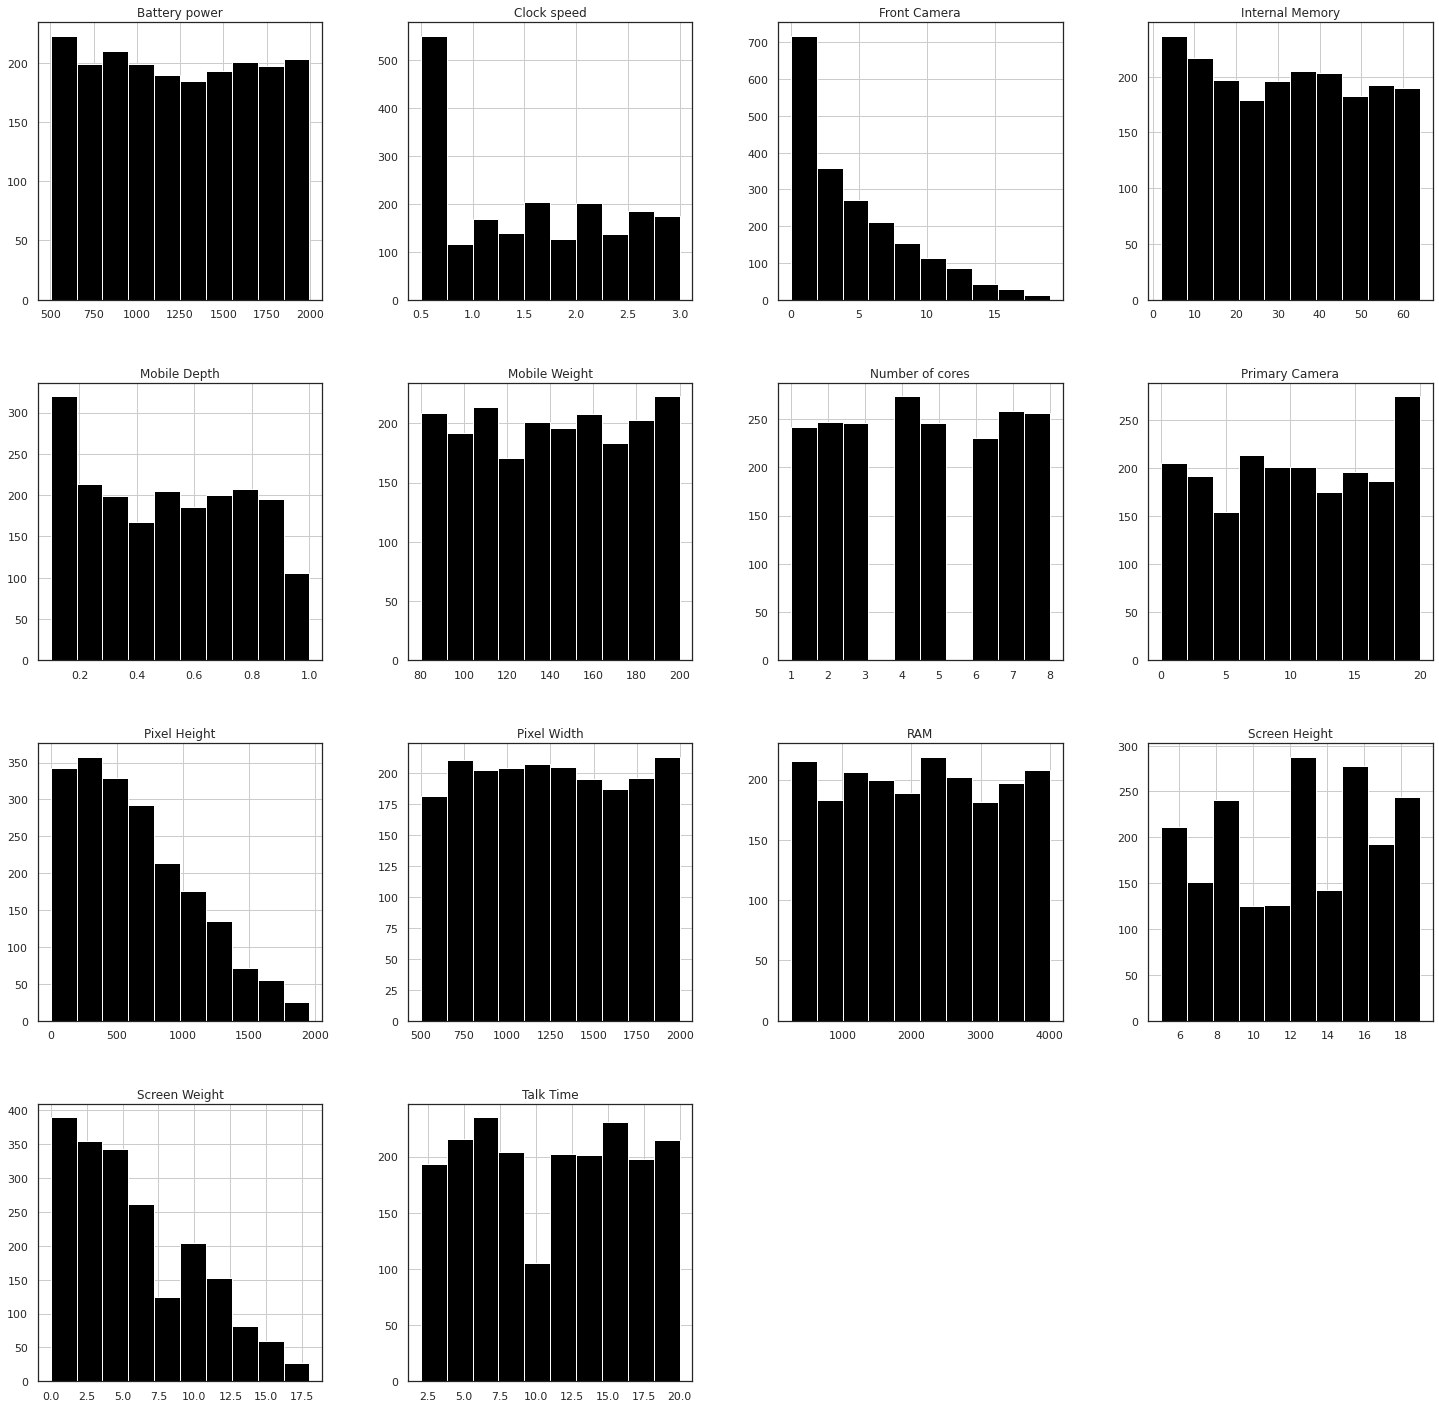

In [ ]:
# Histogram for selected variables
new_mp.hist(figsize=(25,25), color = 'black')
plt.show()

**Outlier columns analysis**

In [ ]:
# Out_only is a dataset with outlier columns.
out_only = mp[['Bluetooth', 'Dual SIM', '4G','3G','Touch Screen', 'WiFi']]
out_only.head()

Bluetooth  Dual SIM  4G  3G  Touch Screen  WiFi
0          0         0   0   0             0     1
1          1         1   1   1             1     0
2          1         1   1   1             1     0
3          1         0   0   1             0     0
4          1         0   1   1             1     0

In [ ]:
# Value counts of out_only dataset.

param = ['Bluetooth', 'Dual SIM', '4G','3G','Touch Screen', 'WiFi']
pd.set_option('display.float_format', '{:.2%}'.format)

for i in param:
    result = mp[i].value_counts(normalize = True)
    print (result)
    print ('\n')

0   50.50%
1   49.50%
Name: Bluetooth, dtype: float64


1   50.95%
0   49.05%
Name: Dual SIM, dtype: float64


1   52.15%
0   47.85%
Name: 4G, dtype: float64


1   76.15%
0   23.85%
Name: 3G, dtype: float64


1   50.30%
0   49.70%
Name: Touch Screen, dtype: float64


1   50.70%
0   49.30%
Name: WiFi, dtype: float64




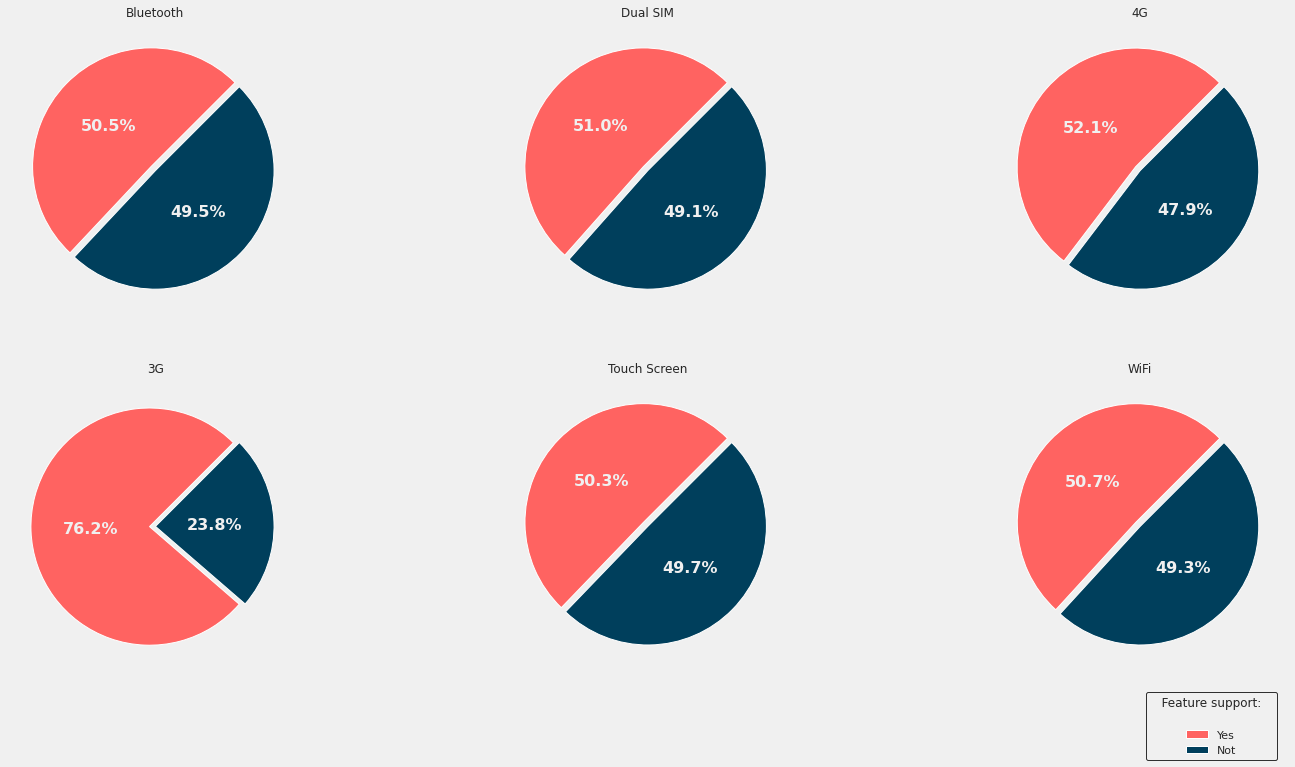

In [ ]:
# Plot Pie

yn = ["Yes",'Not']
n = len(param)
l =[]

for x in range(n):
  l.append(x)


fig, axes = plt.subplots(2,3, figsize=(25, 12))
axe = axes.ravel()

fig.patch.set_facecolor('#F0F0F0')

for i, x in enumerate(param):
  mp[x].value_counts().plot.pie (
      ax = axe[i],
      autopct='%1.1f%%',
      explode = (0.05, 0),
      pctdistance = 0.5,
      colors = ['#ff6361','#003f5c'],
      startangle = 45,
      textprops = {"fontsize":16, 'fontweight':'bold', 'color':'#F0F0F0'}
  )

axe[0].title.set_text('Bluetooth')
axe[1].title.set_text('Dual SIM')
axe[2].title.set_text('4G')
axe[3].title.set_text('3G')
axe[4].title.set_text('Touch Screen')
axe[5].title.set_text('WiFi')


for i in range (n):
  axe[i].set_ylabel('')

plt.legend(title = "   Feature support:   " + "\n", 
           loc='upper left', 
           labels=yn, 
           bbox_to_anchor=(0.5, -0.04),
           facecolor = '#F0F0F0',
           edgecolor = 'black')

plt.show()

In [ ]:
# Adding the new column Price range II - assigning description for values from Price range column
mp['Price range II'] = mp['Price range'].replace([0],'Low cost').replace([1],'Budgeted').replace([2],'Medium cost').replace([3],'Flagship')
mp

Battery power  Bluetooth  Clock speed  Dual SIM  Front Camera  4G  \
0               842          0      220.00%         0             1   0   
1              1021          1       50.00%         1             0   1   
2               563          1       50.00%         1             2   1   
3               615          1      250.00%         0             0   0   
4              1821          1      120.00%         0            13   1   
...             ...        ...          ...       ...           ...  ..   
1995            794          1       50.00%         1             0   1   
1996           1965          1      260.00%         1             0   0   
1997           1911          0       90.00%         1             1   1   
1998           1512          0       90.00%         0             4   1   
1999            510          1      200.00%         1             5   1   

      Internal Memory  Mobile Depth  Mobile Weight  Number of cores  ...  \
0                   7        60.00%            188                2  ...   
1                  53        70.00%            136                3  ...   
2                  41        90.00%            145                5  ...   
3                  10        80.00%            131                6  ...   
4                  44        60.00%            141                2  ...   
...               ...           ...            ...              ...  ...   
1995                2        80.00%            106                6  ...   
1996               39        20.00%            187                4  ...   
1997               36        70.00%            108                8  ...   
1998               46        10.00%            145                5  ...   
1999               45        90.00%            168                6  ...   

      Pixel Width   RAM  Screen Height  Screen Weight  Talk Time  3G  \
0             756  2549              9              7         19   0   
1            1988  2631             17              3          7   1   
2            1716  2603             11              2          9   1   
3            1786  2769             16              8         11   1   
4            1212  1411              8              2         15   1   
...           ...   ...            ...            ...        ...  ..   
1995         1890   668             13              4         19   1   
1996         1965  2032             11             10         16   1   
1997         1632  3057              9              1          5   1   
1998          670   869             18             10         19   1   
1999          754  3919             19              4          2   1   

      Touch Screen  WiFi  Price range  Price range II  
0                0     1            1        Budgeted  
1                1     0            2     Medium cost  
2                1     0            2     Medium cost  
3                0     0            2     Medium cost  
4                1     0            1        Budgeted  
...            ...   ...          ...             ...  
1995             1     0            0        Low cost  
1996             1     1            2     Medium cost  
1997             1     0            3        Flagship  
1998             1     1            0        Low cost  
1999             1     1            3        Flagship  

[2000 rows x 22 columns]

**Explanatory variable analysis**

In [ ]:
# Average values of variables for the grouped price_range variable part I
prGr = mp.groupby(['Price range II'])
prGR = prGr.mean().applymap('{:,.2f}'.format).sort_values(by=['Price range'])
prGR.iloc[0:, :10]

Battery power Bluetooth Clock speed Dual SIM Front Camera  \
Price range II                                                             
Low cost            1,116.90      0.49        1.55     0.50         4.08   
Budgeted            1,228.87      0.49        1.49     0.51         4.34   
Medium cost         1,228.32      0.49        1.53     0.50         4.50   
Flagship            1,379.98      0.52        1.52     0.53         4.32   

                  4G Internal Memory Mobile Depth Mobile Weight  \
Price range II                                                    
Low cost        0.52           31.17         0.49        140.55   
Budgeted        0.52           32.12         0.52        140.51   
Medium cost     0.49           30.92         0.49        143.61   
Flagship        0.55           33.98         0.50        136.32   

               Number of cores  
Price range II                  
Low cost                  4.60  
Budgeted                  4.30  
Medium cost               4.68  
Flagship                  4.50

In [ ]:
# Average values of variables for the grouped price_range variable part II
prGR = prGr.mean().applymap('{:,.2f}'.format).sort_values(by=['Price range'])
prGR.iloc[0:, -10:-1]

Pixel Height Pixel Width       RAM Screen Height Screen Weight  \
Price range II                                                                  
Low cost             536.41    1,150.27    785.31         12.32          5.68   
Budgeted             666.89    1,251.91  1,679.49         12.21          5.54   
Medium cost          632.28    1,234.05  2,582.82         12.01          5.71   
Flagship             744.85    1,369.84  3,449.23         12.68          6.13   

               Talk Time    3G Touch Screen  WiFi  
Price range II                                     
Low cost           10.61  0.75         0.52  0.50  
Budgeted           11.36  0.76         0.52  0.50  
Medium cost        10.97  0.77         0.47  0.50  
Flagship           11.10  0.77         0.50  0.52

**The correlation analysis**

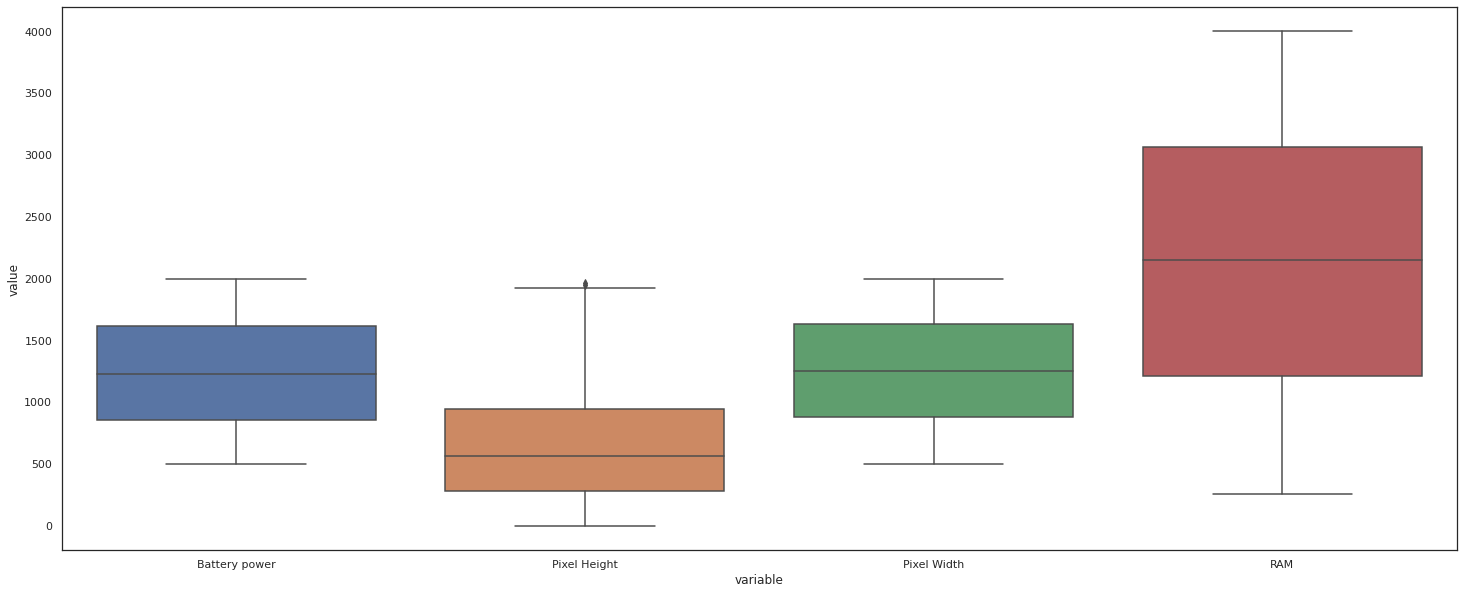

In [ ]:
# Boxplot chart

fig, ax = plt.subplots(figsize =(25,10))
mmp = new_mp.drop(['Clock speed','Front Camera','Internal Memory','Mobile Depth','Mobile Weight','Number of cores','Primary Camera','Screen Height','Screen Weight','Talk Time'], axis=1)
sns.set(style="darkgrid")
sns.boxplot(x="variable", y="value", data=pd.melt(mmp), orient ='v', dodge=False)

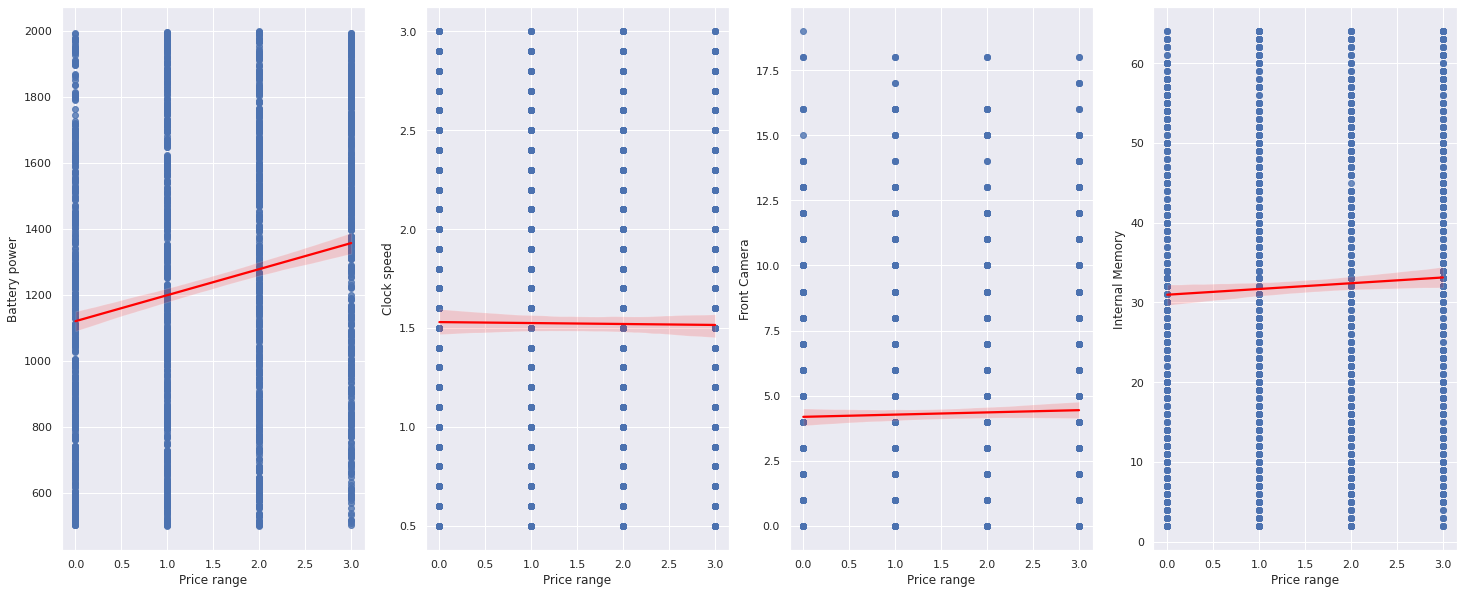

In [ ]:
fig,(ax1, ax2, ax3, ax4) = plt.subplots(ncols=4)
fig.set_size_inches(25, 10)

cols = new_mp.columns.tolist()
cols = cols[0:4]
ax = [ax1,ax2,ax3,ax4]

sns.set_theme(color_codes=True)

for i in range(len(cols)):
    sns.regplot(y = cols[i], x = "Price range", data = mp, ax = ax[i], line_kws = {'color' : 'red'})

plt.show()

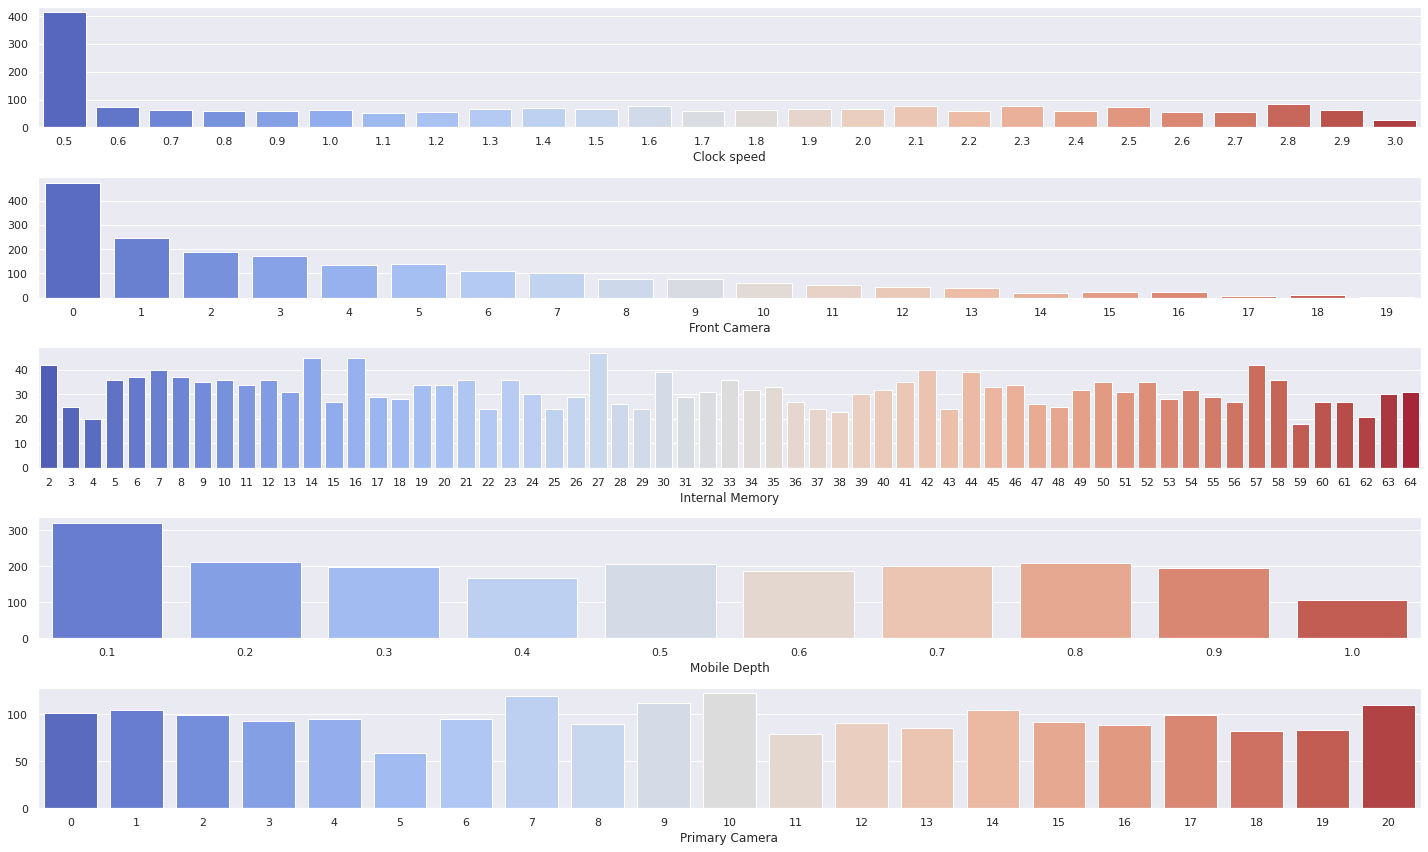

In [ ]:
cols = new_mp.columns.tolist()
n = 5

fig,(ax1, ax2, ax3, ax4, ax5) = plt.subplots(nrows=n)

fig.set_size_inches(20, 12)
sns.set_style('darkgrid')
	
sns.set_context("notebook")
sns.countplot(x = cols[1], data = mp, ax=ax1, palette = 'coolwarm')
sns.countplot(x = cols[2], data = mp, ax=ax2, palette = 'coolwarm')
sns.countplot(x = cols[3], data = mp, ax=ax3, palette = 'coolwarm')
sns.countplot(x = cols[4], data = mp, ax=ax4, palette = 'coolwarm')
sns.countplot(x = cols[7], data = mp, ax=ax5, palette = 'coolwarm')

ax1.set_ylabel('')
ax2.set_ylabel('')
ax3.set_ylabel('')
ax4.set_ylabel('')
ax5.set_ylabel('')

plt.rcParams["patch.force_edgecolor"] = False
plt.tight_layout()
plt.show()

In [ ]:
# The correlation between variables using the standard correlation coefficient (Pearson method).
mpc = mp.corr(method ='pearson')
mpc

Battery power  Bluetooth  Clock speed  Dual SIM  \
Battery power          100.00%      1.13%        1.15%    -4.18%   
Bluetooth                1.13%    100.00%        2.14%     3.52%   
Clock speed              1.15%      2.14%      100.00%    -0.13%   
Dual SIM                -4.18%      3.52%       -0.13%   100.00%   
Front Camera             3.33%      0.36%       -0.04%    -2.91%   
4G                       1.57%      1.34%       -4.31%     0.32%   
Internal Memory         -0.40%      4.12%        0.65%    -1.57%   
Mobile Depth             3.41%      0.40%       -1.44%    -2.21%   
Mobile Weight            0.18%     -0.86%        1.23%    -0.90%   
Number of cores         -2.97%      3.62%       -0.57%    -2.47%   
Primary Camera           3.14%     -1.00%       -0.52%    -1.71%   
Pixel Height             1.49%     -0.69%       -1.45%    -2.09%   
Pixel Width             -0.84%     -4.15%       -0.95%     1.43%   
RAM                     -0.07%      2.64%        0.34%     4.11%   
Screen Height           -3.00%     -0.30%       -2.91%    -1.19%   
Screen Weight           -2.14%      0.06%       -0.74%    -1.67%   
Talk Time                5.25%      1.39%       -1.14%    -3.94%   
3G                       1.15%     -3.02%       -4.64%    -1.40%   
Touch Screen            -1.05%      1.01%        1.98%    -1.71%   
WiFi                    -0.83%     -2.19%       -2.45%     2.27%   
Price range             20.07%      2.06%       -0.66%     1.74%   

                 Front Camera      4G  Internal Memory  Mobile Depth  \
Battery power           3.33%   1.57%           -0.40%         3.41%   
Bluetooth               0.36%   1.34%            4.12%         0.40%   
Clock speed            -0.04%  -4.31%            0.65%        -1.44%   
Dual SIM               -2.91%   0.32%           -1.57%        -2.21%   
Front Camera          100.00%  -1.66%           -2.91%        -0.18%   
4G                     -1.66% 100.00%            0.87%        -0.18%   
Internal Memory        -2.91%   0.87%          100.00%         0.69%   
Mobile Depth           -0.18%  -0.18%            0.69%       100.00%   
Mobile Weight           2.36%  -1.65%           -3.42%         2.18%   
Number of cores        -1.34%  -2.97%           -2.83%        -0.35%   
Primary Camera         64.46%  -0.56%           -3.33%         2.63%   
Pixel Height           -1.00%  -1.92%            1.04%         2.53%   
Pixel Width            -0.52%   0.74%           -0.83%         2.36%   
RAM                     1.51%   0.73%            3.28%        -0.94%   
Screen Height          -1.10%   2.72%            3.78%        -2.53%   
Screen Weight          -1.24%   3.70%            1.17%        -1.84%   
Talk Time              -0.68%  -4.66%           -0.28%         1.70%   
3G                      0.18%  58.42%           -0.94%        -1.21%   
Touch Screen           -1.48%   1.68%           -2.70%        -0.26%   
WiFi                    2.01%  -1.76%            0.70%        -2.84%   
Price range             2.20%   1.48%            4.44%         0.09%   

                 Mobile Weight  Number of cores  ...  Pixel Height  \
Battery power            0.18%           -2.97%  ...         1.49%   
Bluetooth               -0.86%            3.62%  ...        -0.69%   
Clock speed              1.23%           -0.57%  ...        -1.45%   
Dual SIM                -0.90%           -2.47%  ...        -2.09%   
Front Camera             2.36%           -1.34%  ...        -1.00%   
4G                      -1.65%           -2.97%  ...        -1.92%   
Internal Memory         -3.42%           -2.83%  ...         1.04%   
Mobile Depth             2.18%           -0.35%  ...         2.53%   
Mobile Weight          100.00%           -1.90%  ...         0.09%   
Number of cores         -1.90%          100.00%  ...        -0.69%   
Primary Camera           1.88%           -0.12%  ...        -1.85%   
Pixel Height             0.09%           -0.69%  ...       100.00%   
Pixel Width              

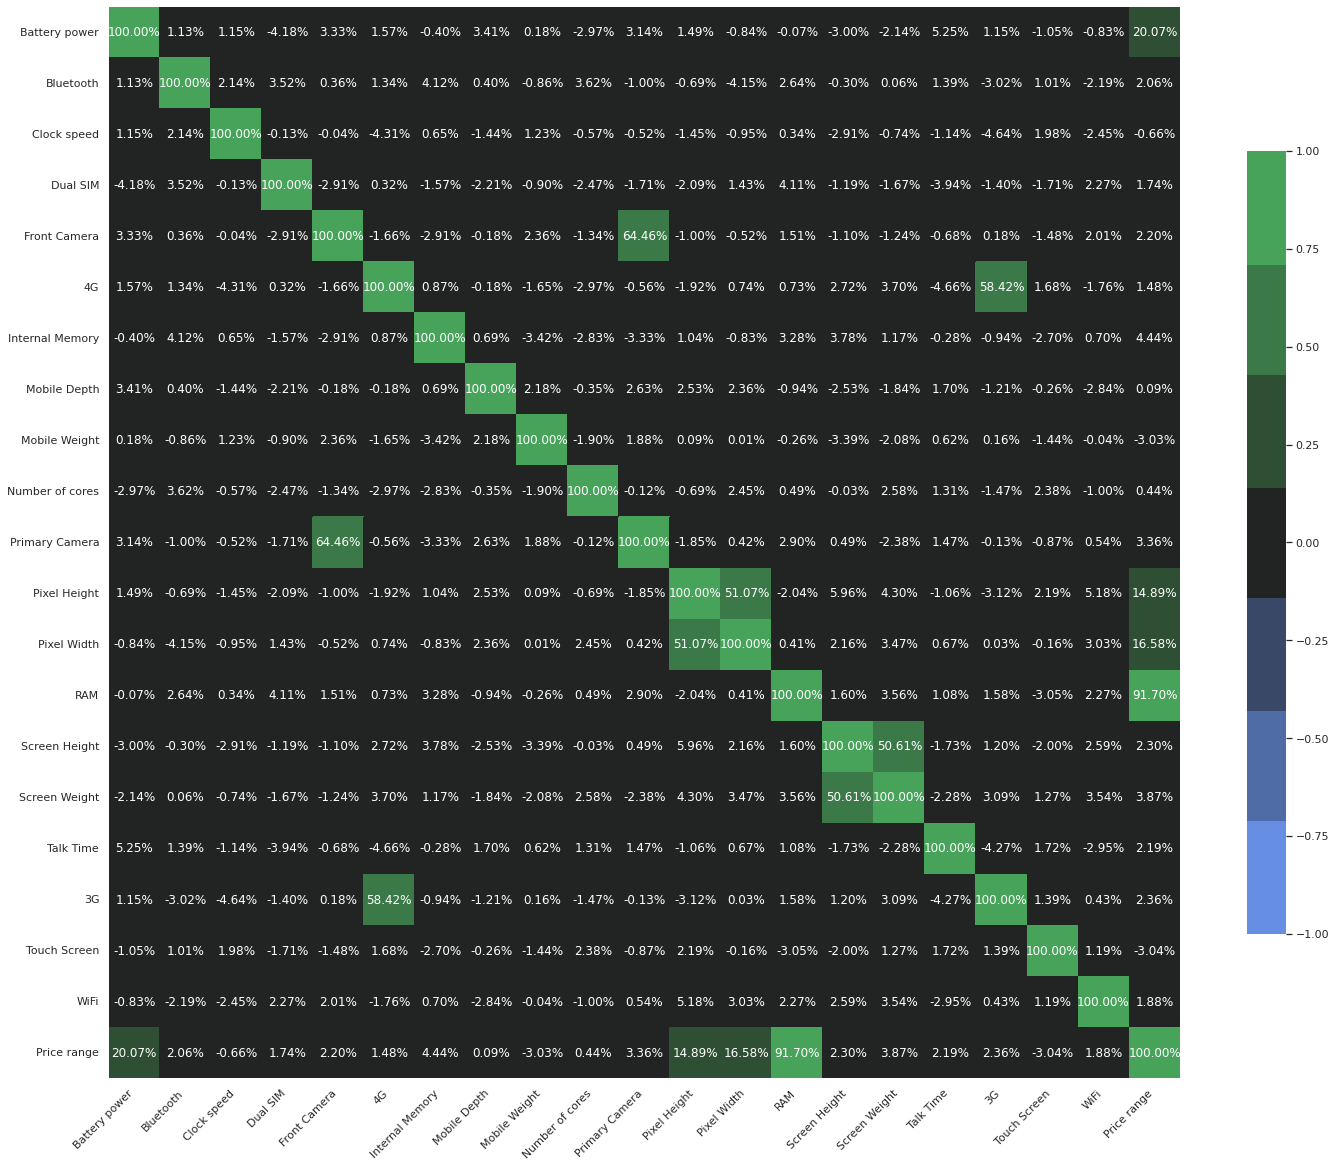

In [ ]:
# The heatmap of correlation (Seaborn Heatmap I)
ax = plt.subplots(figsize=(24,24))
ax = sns.heatmap(mpc, vmin = -1, vmax=1, center=0, annot=True, fmt=".2%", cmap = sns.diverging_palette(255, 133, l=60, n=7, center="dark"), square = True, cbar_kws={"shrink": .6})
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right');

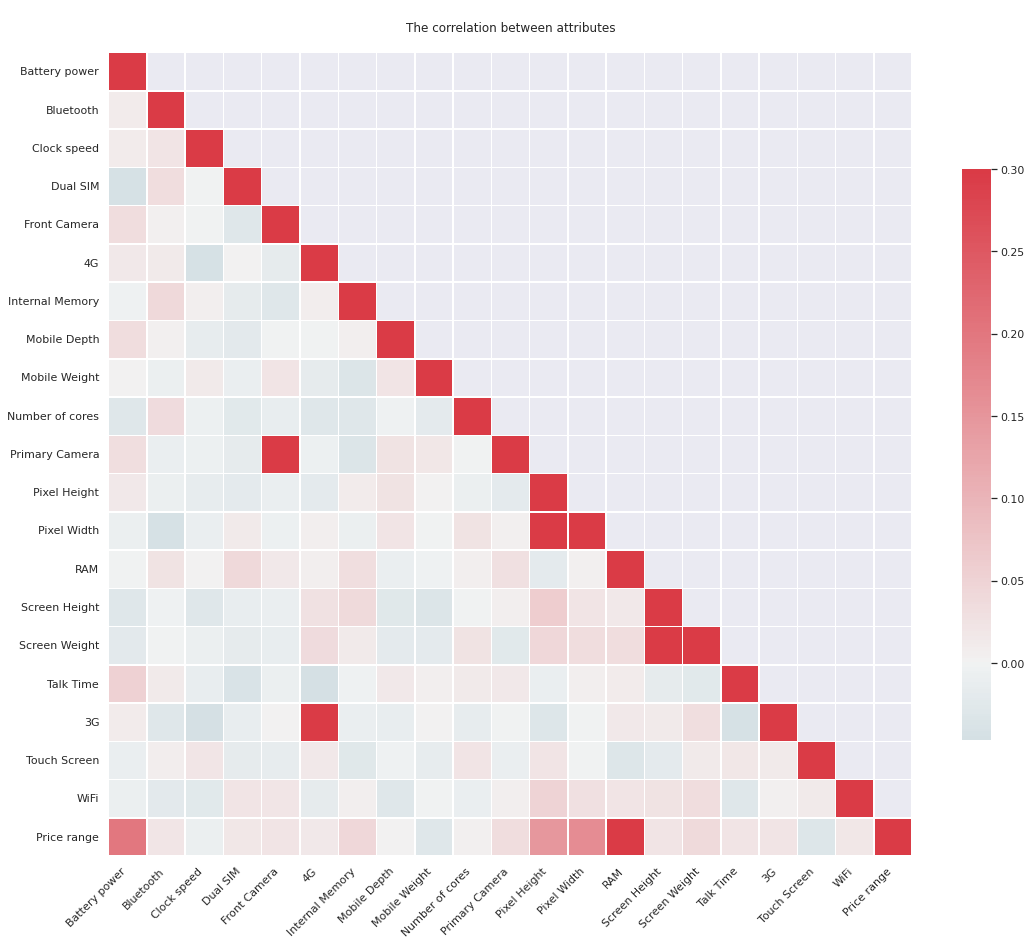

In [ ]:
# The heatmap of correlation with a mask (Seaborn Heatmap II)
f, ax = plt.subplots(figsize=(18,15))
mask = np.array(mpc)
mask[np.tril_indices_from(mask)] = 0 # Creating the triangular matrix
sns.set(style="white")
cmap = sns.diverging_palette(220, 10, as_cmap=True)
ax.title.set_text('\n'+'The correlation between attributes' + '\n')

sns.heatmap(mpc, mask=mask, cmap=cmap, vmax=.3, center=0, square=True, linewidths=.5, cbar_kws={"shrink": .7})
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right');

Text(0.5, 1.0, '\nCorrelation between Price Range and other attributes\n')

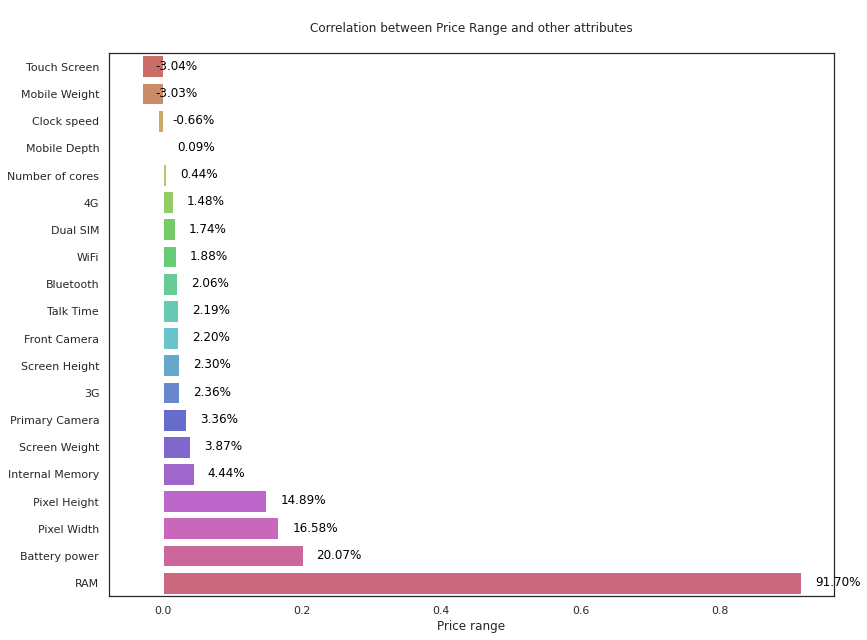

In [ ]:
# The correlation between variables and the grouped price_range variable (Seaborn Barplot)
f, ax = plt.subplots(figsize=(13,10))
sns.set_style('darkgrid')
corr = mpc.corr()
corr = mpc["Price range"]
cr = corr.sort_values(ascending = True)[:-1] # without price_range

sns.barplot(x=cr, y=cr.index, palette = "hls")

for i, v in enumerate(cr):
    ax.text(v + .02, i + .10, "{:.2%}".format(v), color = 'black')
plt.title("\n"+ "Correlation between Price Range and other attributes" +"\n")


In [ ]:
# The most dependent variables:
corr = mpc["Price range"]
result = (corr != 1) & (corr > 0.1)
corr[result].sort_values()

Pixel Height    14.89%
Pixel Width     16.58%
Battery power   20.07%
RAM             91.70%
Name: Price range, dtype: float64

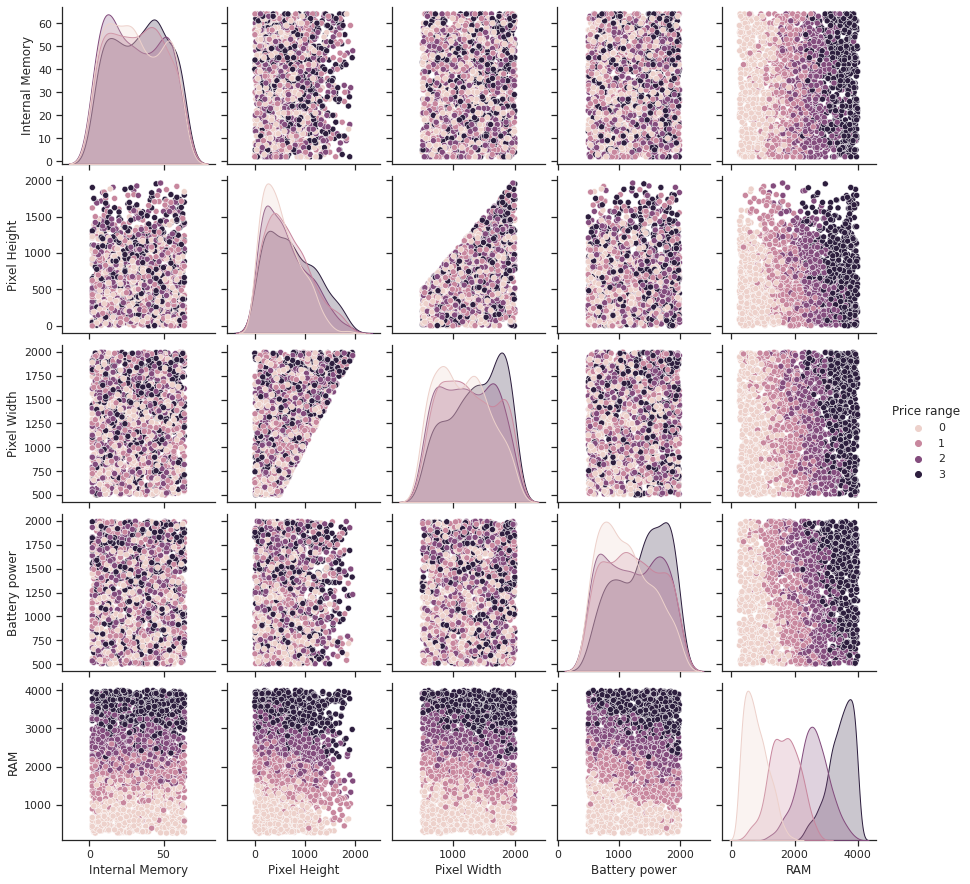

In [ ]:
# Plot pairwise relationships in a dataset (Seaborn Pairplot)
sns.set(style="ticks", color_codes=True)
sns.pairplot(mp, vars = ["Internal Memory", "Pixel Height", "Pixel Width", "Battery power", "RAM"], hue="Price range", diag_kind = "kde")

In [ ]:
# Value counts in defined bins for Price range column
pr = pd.cut(x = mp['Price range'], bins = [-1,0,1,2,3], labels=['Low cost', 'Budgeted', 'Medium cost', 'Flagship']).value_counts()
pr

Low cost       500
Budgeted       500
Medium cost    500
Flagship       500
Name: Price range, dtype: int64

In [ ]:
# Value counts in defined bins for RAM column
ram = pd.cut(x = mp['RAM'], bins = [0, 1024, 2048, 3072, 4096], labels=['< 1GB', '1-2 GB', '2-3 GB', '3-4 GB']).value_counts()
ram = ram.sort_index()
ram

< 1GB     406
1-2 GB    542
2-3 GB    555
3-4 GB    497
Name: RAM, dtype: int64

In [ ]:
# Plotly Bubble Chart

enable_plotly_in_cell()

fig = go.Figure(data=[go.Scatter(
    x = list(ram.index.values),
    y = ram.tolist(),
    mode='markers',
    marker=dict(
        color=[120, 125, 128, 132],
        size=[30, 60, 70, 50],
        showscale=True
        )
)])



fig.update_layout(
    autosize=False,
    width=1500,
    height=400,
    margin=dict(
        l=50,
        r=50,
        b=50,
        t=50,
        pad=4
    ))

iplot(fig)

In [ ]:
x = mp.groupby(['RAM']).filter(lambda x: x["Price range"].mean()>=3)
m = x['RAM'].min(axis=0)
n = x['RAM'].max(axis=0)

print('The smallest RAM in the maximum price_range: ' + str(m))
print('The biggest RAM in the maximum price_range: ' + str(n))

The smallest RAM in the maximum price_range: 2259
The biggest RAM in the maximum price_range: 3998


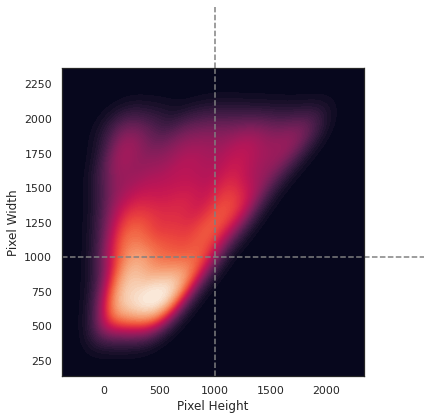

In [ ]:
# Grid for drawing a bivariate plot with marginal univariate plots (JointGrid Seaborn)
sns.set_theme(style="white")
g = sns.JointGrid(data=mp, x ="Pixel Height", y = "Pixel Width", space=0)
g.plot_joint(sns.kdeplot, fill=True, thresh=0, levels=100, cmap="rocket")
g.refline(x=1000, y=1000)

**Export Google Colab notebook to HTML**

In [ ]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [ ]:
%%shell
jupyter nbconvert --to html /content/drive/MyDrive/Colab/Task.ipynb

[NbConvertApp] Converting notebook /content/drive/MyDrive/Colab/Task.ipynb to html
[NbConvertApp] Writing 1353109 bytes to /content/drive/MyDrive/Colab/Task.html
